<a href="https://colab.research.google.com/github/suyashmarathe512/suyash/blob/main/Binance%20Trade%20Analysis/Analysis_of_Binance_Trade_Data_Financial_Metrics_and_Account_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import ast


df = pd.read_csv("/content/drive/MyDrive/Copy of TRADES_CopyTr_90D_ROI.csv")
print("Original DataFrame:")
print(df.head())

def parse_trade_history(entry):
    """
    Parses a trade_history entry.
    - If entry is missing, returns an empty list.
    - If the entry is not already a list (i.e. doesn't start with '['), it wraps it in square brackets.
    - Uses ast.literal_eval to safely evaluate the string into a Python object.
    """
    if pd.isna(entry):
        return []
    try:
        entry_str = entry.strip()
        if not entry_str.startswith('['):
            entry_str = '[' + entry_str + ']'
        return ast.literal_eval(entry_str)
    except Exception as e:
        print("Error parsing entry:", entry, "\nError:", e)
        return []

expanded_rows = []

for idx, row in df.iterrows():
    Port_IDs = row['Port_IDs']
    trade_list = parse_trade_history(row['Trade_History'])
    # For each trade (dictionary) in the list, add a new row with the port_id.
    for trade in trade_list:
        if isinstance(trade, dict):
            trade_copy = trade.copy()
            trade_copy['Port_IDs'] = Port_IDs
            expanded_rows.append(trade_copy)

# 4. Create a new DataFrame from the expanded rows.
expanded_df = pd.DataFrame(expanded_rows)

if 'Port_IDs' in expanded_df.columns:
    cols = list(expanded_df.columns)
    cols.insert(0, cols.pop(cols.index('Port_IDs')))
    expanded_df = expanded_df[cols]

# 5. Display the new expanded DataFrame.
print("Expanded DataFrame:")
print(expanded_df.head())


Original DataFrame:
              Port_IDs                                      Trade_History
0  3925368433214965504  [{'time': 1718899656000, 'symbol': 'SOLUSDT', ...
1  4002413037164645377  [{'time': 1718980078000, 'symbol': 'NEARUSDT',...
2  3923766029921022977  [{'time': 1718677164000, 'symbol': 'ETHUSDT', ...
3  3994879592543698688  [{'time': 1718678214000, 'symbol': 'ETHUSDT', ...
4  3926423286576838657  [{'time': 1718979615000, 'symbol': 'ETHUSDT', ...
Expanded DataFrame:
              Port_IDs           time    symbol side      price       fee  \
0  3925368433214965504  1718899656000   SOLUSDT  BUY  132.53700 -0.994027   
1  3925368433214965504  1718899618000  DOGEUSDT  BUY    0.12182 -0.279796   
2  3925368433214965504  1718899618000  DOGEUSDT  BUY    0.12182 -0.039494   
3  3925368433214965504  1718899616000  DOGEUSDT  BUY    0.12182 -0.008284   
4  3925368433214965504  1718899616000  DOGEUSDT  BUY    0.12182 -0.046109   

  feeAsset    quantity quantityAsset  realizedProfit 

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

print("Dataset shape:", df.shape)
print("Dataset columns:", df.columns.tolist())
display(expanded_df.head())


print("Missing values per column:\n", expanded_df.isnull().sum())

if 'positionSide' in df.columns:
    df['positionSide'].fillna('NA', inplace=True)
else:
    df['positionSide'] = 'NA'
expanded_df['time'] = pd.to_datetime(expanded_df['time'], unit='ms')


Dataset shape: (150, 2)
Dataset columns: ['Port_IDs', 'Trade_History']


,Port_IDs,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,3925368433214965504,1718899656000,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,1718899618000,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,1718899618000,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,3925368433214965504,1718899616000,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,3925368433214965504,1718899616000,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True


Missing values per column:
 Port_IDs               0
time                   0
symbol                 0
side                   0
price                  0
fee                    0
feeAsset               0
quantity               0
quantityAsset          0
realizedProfit         0
realizedProfitAsset    0
baseAsset              0
qty                    0
positionSide           0
activeBuy              0
dtype: int64


#  3. Feature Engineering

In [ ]:

# 3. Feature Engineering
expanded_df['trade_type'] = expanded_df['side'] + "_" + expanded_df['positionSide'].astype(str)
# Compute per-trade return.
expanded_df['trade_return'] = expanded_df.apply(lambda x: x['realizedProfit'] / x['quantity'] if x['quantity'] != 0 else np.nan, axis=1)


display(expanded_df.loc[55:60])


,Port_IDs,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,trade_type,trade_return
55,3925368433214965504,2024-06-20 08:43:25,FILUSDT,BUY,4.542,-0.023391,USDT,46.78260,USDT,0.000000,USDT,FIL,10.30,LONG,True,BUY_LONG,0.000000
56,3925368433214965504,2024-06-20 08:43:25,FILUSDT,BUY,4.542,-0.003634,USDT,7.26720,USDT,0.000000,USDT,FIL,1.60,LONG,True,BUY_LONG,0.000000
57,3925368433214965504,2024-06-20 08:43:25,FILUSDT,BUY,4.542,-0.076078,USDT,152.15700,USDT,0.000000,USDT,FIL,33.50,LONG,True,BUY_LONG,0.000000
58,3925368433214965504,2024-06-20 07:23:07,ETCUSDT,SELL,24.622,-0.042227,USDT,84.45346,USDT,3.243978,USDT,ETC,3.43,LONG,False,SELL_LONG,0.038411
59,3925368433214965504,2024-06-20 07:23:07,ETCUSDT,SELL,24.622,-0.200300,USDT,400.59994,USDT,15.387615,USDT,ETC,16.27,LONG,False,SELL_LONG,0.038411
60,3925368433214965504,2024-06-20 07:23:07,ETCUSDT,SELL,24.622,-0.677105,USDT,1354.21000,USDT,52.017137,USDT,ETC,55.00,LONG,False,SELL_LONG,0.038411


# Metrics Calculation

In [ ]:

def compute_account_metrics(group):

    # Total Profit and Loss
    total_pnl = group['realizedProfit'].sum()

    # Total number of trades (positions)
    total_positions = len(group)

    # Number of winning trades
    win_positions = (group['realizedProfit'] > 0).sum()

    # Win rate: fraction of trades with positive profit
    win_rate = win_positions / total_positions if total_positions > 0 else np.nan

    # ROI (Return on Investment): profit as a percentage of the total capital invested
    invested_capital = group['quantity'].sum()
    roi = (total_pnl / invested_capital) * 100 if invested_capital != 0 else np.nan

    # Compute trade return for each trade (realizedProfit divided by quantity)
    group = group.copy()
    group['trade_return'] = group.apply(
        lambda row: row['realizedProfit'] / row['quantity'] if row['quantity'] != 0 else np.nan,
        axis=1
    )
    returns = group['trade_return'].dropna()
    sharpe_ratio = returns.mean() / returns.std() if returns.std() != 0 else np.nan

    # Compute Maximum Drawdown (MDD)
    group_sorted = group.sort_values('time')
    cumulative_pnl = group_sorted['realizedProfit'].cumsum()
    running_max = cumulative_pnl.cummax()
    drawdown = running_max - cumulative_pnl
    mdd = drawdown.max()

    return pd.Series({
        'Total_PnL': total_pnl,
        'Total_Positions': total_positions,
        'Win_Positions': win_positions,
        'Win_Rate': win_rate,
        'ROI': roi,
        'Sharpe_Ratio': sharpe_ratio,
        'MDD': mdd
    })


metrics_df = expanded_df.groupby('Port_IDs').apply(compute_account_metrics).reset_index()


print("Computed Metrics per Account:")
print(metrics_df.head())
print(metrics_df.shape)



Computed Metrics per Account:
              Port_IDs    Total_PnL  Total_Positions  Win_Positions  Win_Rate  \
0  3672754654734989568   566.597660            474.0          210.0  0.443038   
1  3733192481840423936  2923.977200            689.0          553.0  0.802612   
2  3768170840939476993   243.668899             14.0            6.0  0.428571   
3  3784403294629753856  2521.814305           6050.0         1829.0  0.302314   
4  3786761687746711808   205.021400             82.0           37.0  0.451220   

        ROI  Sharpe_Ratio          MDD  
0  0.476385      0.296234    80.777037  
1  0.251099      0.964747  2743.120000  
2  8.779089      0.834517     0.000000  
3  0.339819      0.218565   271.291981  
4  0.332072      0.527425   123.460267  
(149, 8)


<ipython-input-48-bc341c806fb9>:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_df = expanded_df.groupby('Port_IDs').apply(compute_account_metrics).reset_index()


# 5. Normalization & Weighted Scoring

In [ ]:

# To combine different metrics, we first normalize them.
# We will use Min-Max scaling on metrics that we want to reward when higher: ROI, Sharpe_Ratio, Win_Rate, Total_PnL.
# For MDD, since lower is better, we invert the normalized value.

metrics_norm = metrics_df.copy()

scaler = MinMaxScaler()

# List of metrics to scale positively
for metric in ['ROI', 'Sharpe_Ratio', 'Win_Rate', 'Total_PnL']:
    # Fill NaNs with 0
    metrics_norm[metric] = metrics_norm[metric].fillna(0)
    metrics_norm[metric + '_norm'] = scaler.fit_transform(metrics_norm[[metric]])

# For MDD (lower is better) – first scale, then invert the score.
metrics_norm['MDD'] = metrics_norm['MDD'].fillna(0)
metrics_norm['MDD_norm'] = scaler.fit_transform(metrics_norm[['MDD']])
metrics_norm['MDD_norm'] = 1 - metrics_norm['MDD_norm']

# Define weights for each metric (the weights sum to 1)
weights = {
    'ROI_norm': 0.3,
    'Sharpe_Ratio_norm': 0.3,
    'Win_Rate_norm': 0.2,
    'Total_PnL_norm': 0.1,
    'MDD_norm': 0.1
}

# Compute the composite score for each account
metrics_norm['Score'] = (
    weights['ROI_norm'] * metrics_norm['ROI_norm'] +
    weights['Sharpe_Ratio_norm'] * metrics_norm['Sharpe_Ratio_norm'] +
    weights['Win_Rate_norm'] * metrics_norm['Win_Rate_norm'] +
    weights['Total_PnL_norm'] * metrics_norm['Total_PnL_norm'] +
    weights['MDD_norm'] * metrics_norm['MDD_norm']
)


# 6. Ranking & Top 20 Accounts

In [ ]:

# Sort accounts by the composite score in descending order
metrics_norm.sort_values('Score', ascending=False, inplace=True)

# Get the top 20 accounts
top20_accounts = metrics_norm.head(20)

print("Top 20 Accounts Ranked by Composite Score:")
display(top20_accounts[['Port_IDs', 'ROI', 'Total_PnL', 'Sharpe_Ratio', 'MDD', 'Win_Rate', 'Win_Positions', 'Total_Positions', 'Score']])


metrics_df.to_csv("/content/drive/MyDrive/prime trade/account_metrics.csv", index=False)
top20_accounts.to_csv("/content/drive/MyDrive/prime trade/top20_accounts.csv", index=False)


Top 20 Accounts Ranked by Composite Score:


,Port_IDs,ROI,Total_PnL,Sharpe_Ratio,MDD,Win_Rate,Win_Positions,Total_Positions,Score
8,3826087012661391104,12.178517,532.656974,0.791784,12.925980,0.583333,63.0,108.0,0.768829
2,3768170840939476993,8.779089,243.668899,0.834517,0.000000,0.428571,6.0,14.0,0.654897
62,3986814617275053313,0.871628,16337.461881,1.288552,2.381947,0.782217,2780.0,3554.0,0.648750
47,3956048468100538880,1.114561,1373.564890,1.322352,0.000000,0.714286,20.0,28.0,0.625831
16,3891020560590657281,1.743407,2856.300564,1.128399,0.000000,0.647597,283.0,437.0,0.592692
1,3733192481840423936,0.251099,2923.977200,0.964747,2743.120000,0.802612,553.0,689.0,0.554042
144,4039279455324236544,1.022101,1038.807419,1.101072,0.000000,0.553517,181.0,327.0,0.544868
143,4039129759104249600,3.162479,1264.289200,0.886581,0.000000,0.443609,59.0,133.0,0.532590
58,3977234346014419201,4.102464,2427.292831,0.801790,0.000000,0.397590,33.0,83.0,0.530646
133,4035430878731345664,1.909902,2493.750420,0.947716,0.000000,0.483146,43.0,89.0,0.524081


# Data Visualization

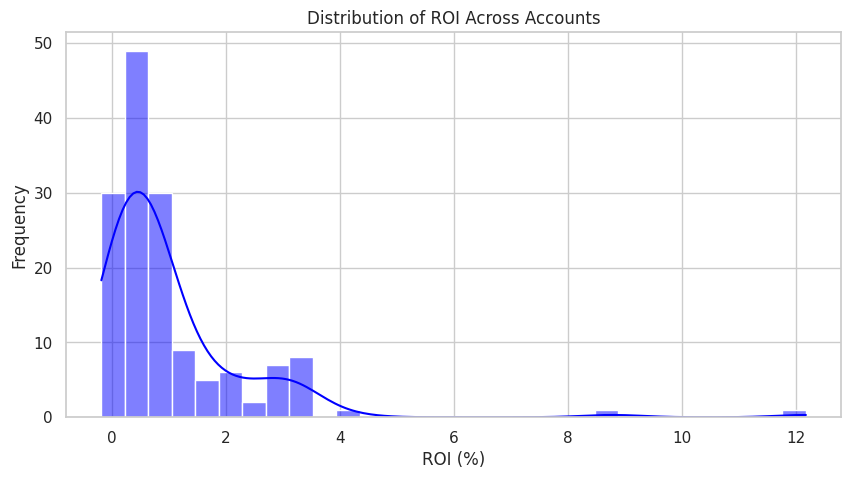

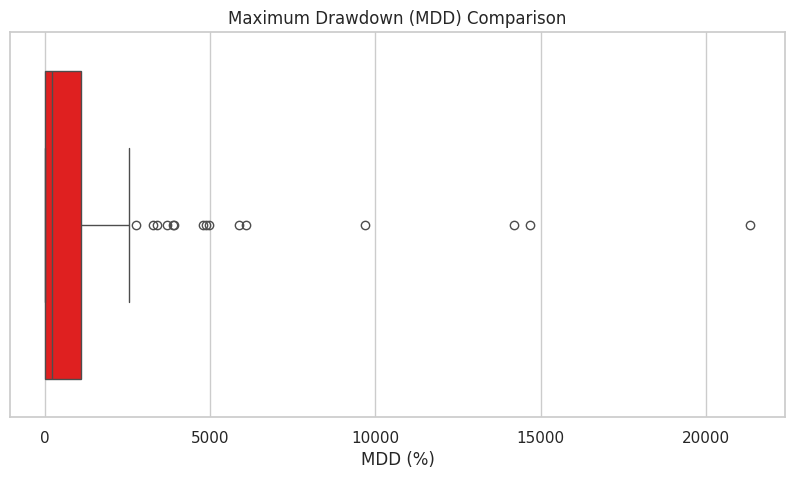

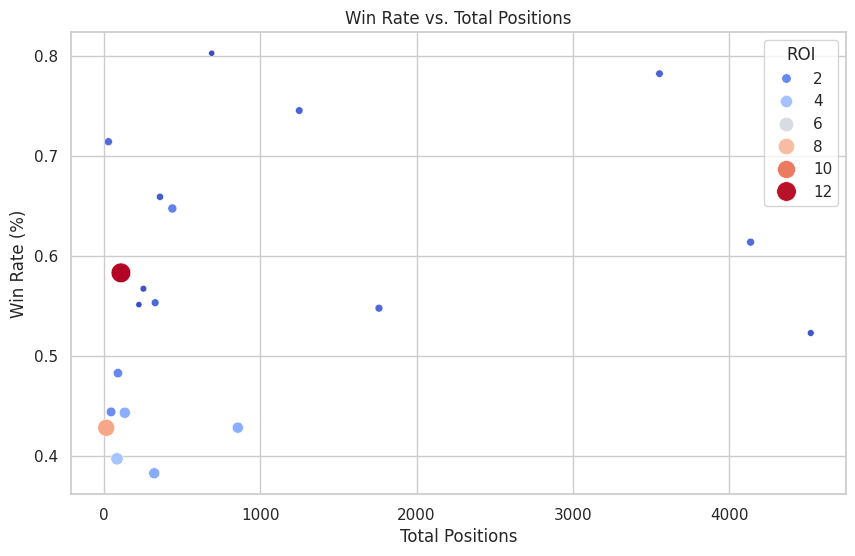

<ipython-input-51-e812210d6ca7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top20_accounts['Port_IDs'], x=top20_accounts['Score'], palette='viridis')


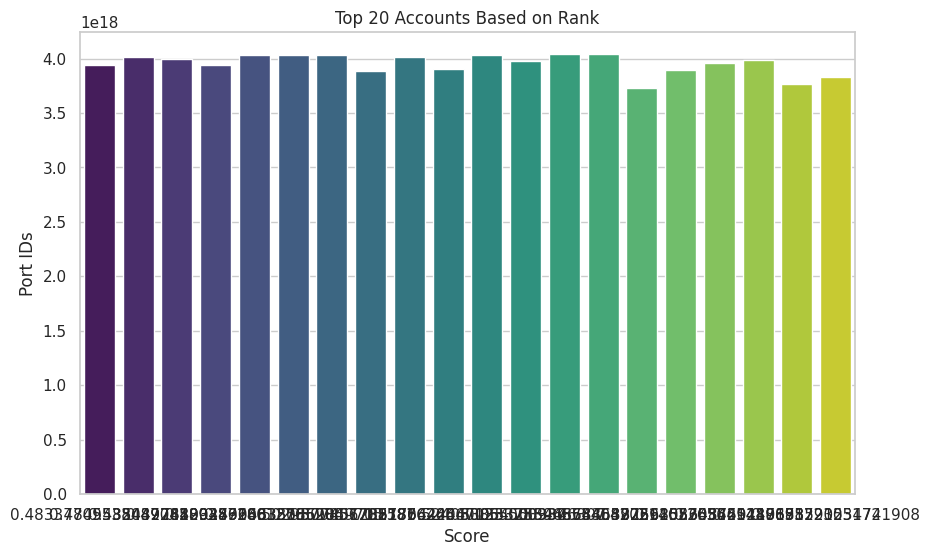

In [ ]:
import seaborn as sns

# Set style for all graphs
sns.set(style="whitegrid")

# 1. Distribution of ROI Across Accounts
plt.figure(figsize=(10, 5))
sns.histplot(metrics_norm['ROI'], bins=30, kde=True, color='blue')
plt.title("Distribution of ROI Across Accounts")
plt.xlabel("ROI (%)")
plt.ylabel("Frequency")
plt.show()

# 3. Maximum Drawdown (MDD) Comparison
plt.figure(figsize=(10, 5))
sns.boxplot(x=metrics_norm['MDD'], color='red')
plt.title("Maximum Drawdown (MDD) Comparison")
plt.xlabel("MDD (%)")
plt.show()

# 4. Win Rate vs. Total Positions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top20_accounts['Total_Positions'], y=top20_accounts['Win_Rate'], hue=top20_accounts['ROI'], size=top20_accounts['ROI'], sizes=(20, 200), palette='coolwarm')
plt.title("Win Rate vs. Total Positions")
plt.xlabel("Total Positions")
plt.ylabel("Win Rate (%)")
plt.show()

# 5. Top 20 Accounts Based on Rank
plt.figure(figsize=(10, 6))
sns.barplot(y=top20_accounts['Port_IDs'], x=top20_accounts['Score'], palette='viridis')
plt.title("Top 20 Accounts Based on Rank")
plt.xlabel("Score")
plt.ylabel("Port IDs")
plt.show()


